In [1]:
from models import Generator, Discriminator
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
G = Generator(latent_dim = 128, n_classes = 5, cont_dim = 5, img_size=128)

torch.Size([1, 131072])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(128, 128, 3)
[[[-2.10452639e-03  1.54978421e-03 -1.51893264e-03]
  [-3.81580926e-03  5.86663780e-04 -1.25037627e-02]
  [-8.30107648e-03  1.71505124e-03 -1.47820953e-02]
  ...
  [-2.89805187e-03 -2.49550701e-03 -1.17255831e-02]
  [-3.20502580e-03 -5.29948995e-03 -7.86132179e-03]
  [-3.19435564e-03 -7.62522547e-03  4.94817505e-03]]

 [[ 1.21977262e-03  6.44103438e-03  5.75766840e-04]
  [-3.75532405e-03  4.43509128e-03 -1.25529431e-02]
  [-5.15128346e-03  3.70378396e-03 -9.72339604e-03]
  ...
  [-1.57305803e-02  1.97316497e-03 -1.62197612e-02]
  [-1.77620798e-02 -1.04525650e-03 -1.43195074e-02]
  [-1.33806979e-02  2.96539022e-03 -4.86550294e-03]]

 [[ 1.92788756e-03  3.05399694e-03  1.31686882e-03]
  [-4.83788969e-03  1.40475249e-03 -1.16845118e-02]
  [-7.97081552e-03  1.81975670e-03 -1.10410219e-02]
  ...
  [-6.57083327e-03  1.85136939e-03 -1.69677287e-02]
  [-5.22993132e-03 -3.82092898e-03 -9.75878164e-03]
  [-8.46906286e-03  3.74549162e-03 -9.13142459e-04]]

 ...

 [[-1.04395589e-02  

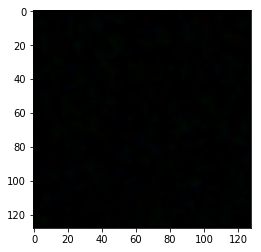

In [3]:
noise = torch.rand(128).reshape(1, -1)
labels = torch.rand(5).reshape(1, -1)
cont_dim = torch.rand(5).reshape(1, -1)
img = G.forward(noise, labels, cont_dim).detach().numpy()

img = img.reshape(3, 128, 128)
img = np.moveaxis(img, 0, -1)
print(img.shape)
plt.imshow(img)
print(img)

In [4]:
D = Discriminator(latent_dim = 128, n_classes = 5, cont_dim = 5, img_size=128)

In [5]:
D.forward(G.forward(noise, labels, cont_dim))

torch.Size([1, 131072])


C:\Users\hamish\.julia\conda\3\lib\site-packages\torch\nn\modules\container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


(tensor([[-0.0050]], grad_fn=<AddmmBackward>),
 tensor([[0.2008, 0.2007, 0.2003, 0.1995, 0.1986]], grad_fn=<SoftmaxBackward>),
 tensor([[-0.0004, -0.0024,  0.0052,  0.0090,  0.0048]],
        grad_fn=<AddmmBackward>))